In [26]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("darkgrid")

from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from astropy.io import fits
from astropy.table import Table
import PySimpleGUI as sg
import winsound
import cellbell

In [4]:
dat = Table.read(r'Test1.fits', format='fits')
df = dat.to_pandas()
n = 10
dataset = np.empty(n, dtype=object)
datasetX = np.empty(n, dtype=object)
datasetY = np.empty(n, dtype=object)

for i in range(n):
    dataset[i] = df.loc[np.array(range(df.shape[0])) % 100 == i, :]
for i in range(n):
    dataset[i].reset_index(drop=True,inplace=True)
    datasetX[i] = pd.DataFrame(StandardScaler().fit_transform(dataset[i][['dered_u','dered_g','dered_r','dered_i','dered_z']]),columns = ['dered_u','dered_g','dered_r','dered_i','dered_z'])
    datasetY[i] = dataset[i]['z']

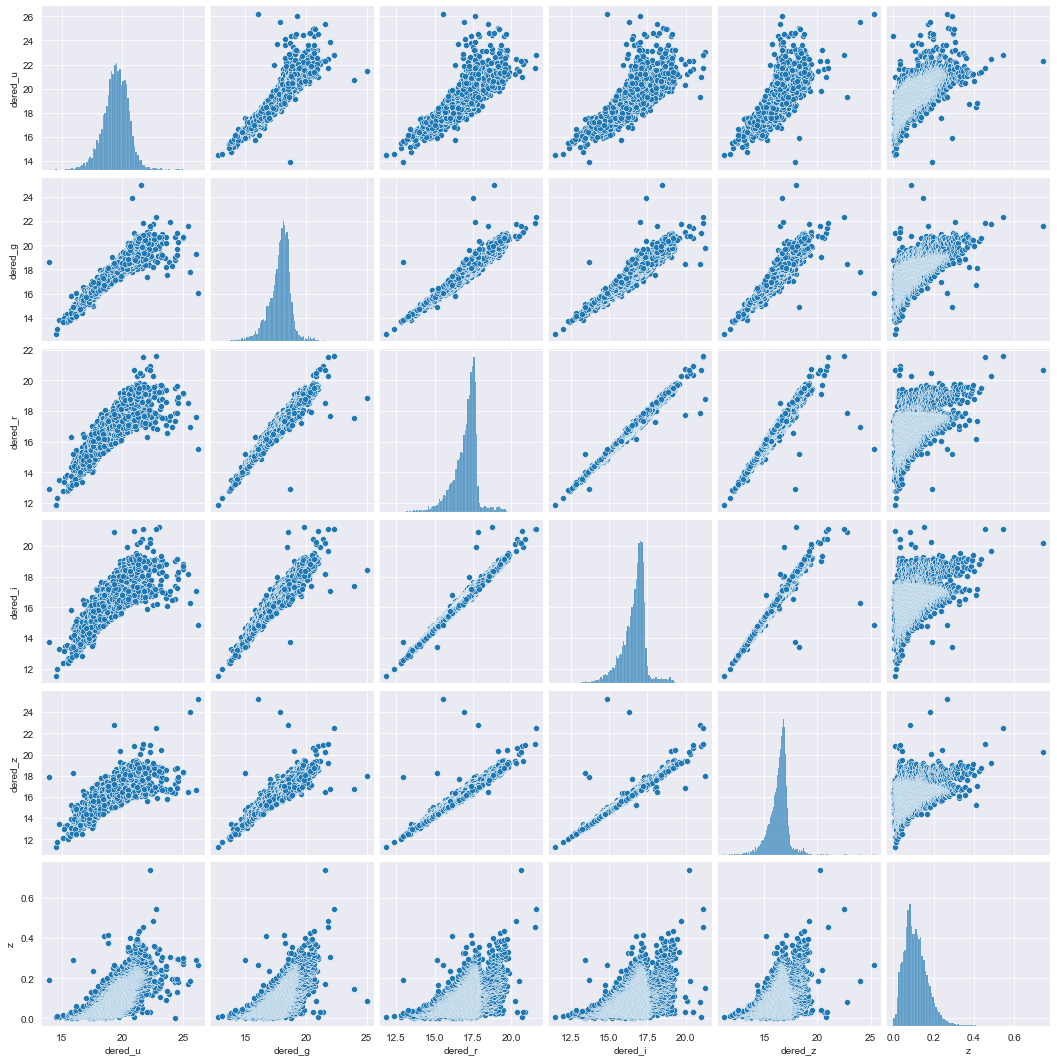

In [13]:
sns.pairplot(dataset[0])
plt.show()

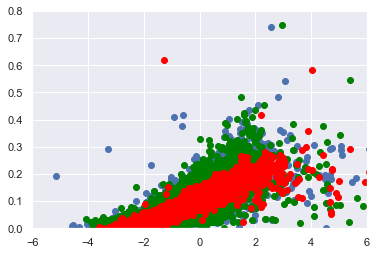

Fit score is  0.6045280979982683


In [14]:
linmod = LinearRegression()
linmod.fit(datasetX[0],datasetY[0])
yfit = linmod.predict(datasetX[2])
diffY = abs(datasetY[0] - yfit)

sns.set()
plt.scatter(datasetX[0]['dered_u'],datasetY[0])
plt.scatter(datasetX[3]['dered_u'],datasetY[3], color = 'green')
plt.scatter(datasetX[2]['dered_u'],yfit,color = 'red')
plt.xlim(-6,6)
plt.ylim(0,0.8)
plt.show()
print('Fit score is ', linmod.score(datasetX[0],datasetY[0]))


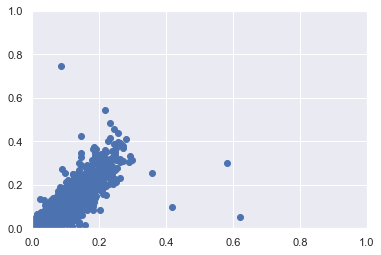

In [15]:
plt.scatter(yfit,datasetY[2])
plt.ylim(0,1)
plt.xlim(0,1)
plt.show()

In [5]:
%%ding
mlp = MLPRegressor(hidden_layer_sizes=(50,50,50), activation='tanh', solver='sgd',batch_size='auto',random_state=33)

# nt is no. of training datasets used per random state
nt = 7

# nts is no. of testing datasets used per random state
nts = 3

# number of random states used
rdnum = 5

# which file to read from (if file doesn't exist or left blank, a blank DataFrame is created instead)
# even if left blank, '' must be present
fread = ''

# which file to write to (if file doesn't exist, a file with same name will be created)
fwrite = 'Test1 results/MainData (tanh, sgd).json'

# list of hidden layer sizes. Each hidden layer size should be in the data type "tuple".
# multiple hidden layer sizes can be put together in a List so that the code runs through all of them
# i.e. [(1,1,1),(2,2),...]
hddlsz = [(100,100,100),(100,100),(100),(50,50,50),(50,50),(50),(25,25,25),(25,25),(25),(10,10,10),(10,10),(10),(5,5,5),(5,5),(5)]

# random state of the rng 
randst = 33


try:
    mdata = pd.read_json(fwrite) 
except:
    event = 'Proceed'
else:
    if fread == fwrite:
        winsound.PlaySound("SystemHand", winsound.SND_ALIAS)
        event, values = sg.Window('WARNING',
                      [[sg.T('WARNING - fread == fwrite! Proceeding will add current data to ' + fread + '!')],
                      [sg.B('Proceed'), sg.B('Cancel') ]]).read(close=True)
    else:
        winsound.PlaySound("SystemHand", winsound.SND_ALIAS)
        event, values = sg.Window('WARNING',
                      [[sg.T('WARNING - ' + fwrite + ' already exist! Proceeding will overwrite the data in ' + fwrite + '!')],
                      [sg.B('Proceed'), sg.B('Cancel') ]]).read(close=True)

        
try:
    mdata = pd.read_json(fread)
except:
    mdata = pd.DataFrame()

if event == 'Proceed':   
    for x in hddlsz:
        mlp.hidden_layer_sizes = x
        dataname = list()
        for j in range(nt):
                dataname = dataname + ['dataset ' + str(j)]

        for k in range(rdnum):      
            mlp.random_state = randst + k
            score = np.empty([nt,nts],dtype=object)
            ypredict = np.empty([nt,nts],dtype=object)
            loss = np.empty(nt,dtype=object)
            for i in range(nt):  
                mlp.fit(datasetX[i],datasetY[i])
                loss[i] = mlp.loss_
                for j in range(nt,nt+nts):
                    score[i][j-nt] = mlp.score(datasetX[j],datasetY[j])
                    ypredict[i][j-nt] = mlp.predict(datasetX[j])


            Loss = loss[:,np.newaxis]
            comb = np.concatenate((score,Loss,ypredict),axis=1)
            SCORE = pd.DataFrame(data = comb, columns = ['Score data 7','Score data 8','Score data 9','Loss','ypredict data 7','ypredict data 8','ypredict data 9'])
            SCORE['Hidden layer size'] = [mlp.hidden_layer_sizes]*nt
            SCORE['Random state'] = [mlp.random_state]*nt 
            SCORE['Training data'] = dataname
            mdata = mdata.append(SCORE, ignore_index = True)

    pd.DataFrame(mdata).to_json(fwrite)
    mdata.tail()
else:
    print('Process has been stopped.')

# Testing area

In [35]:
print('ssaass')
%%ding 
print('ss')
winsound.PlaySound("SystemHand", winsound.SND_ALIAS)
event, values = sg.Window('WARNING', [[sg.T('WARNING - fread == fwrite! Proceeding will add current')], [sg.B('Proceed'), sg.B('Cancel') ]]).read(close=True)

ssaass


UsageError: Line magic function `%%ding` not found.
